## Assignment 1

**Student Name: Dhananjay Madhukar Pandya**<br />
**Student Number: 218202943**

### Part-1 (Clustering):
*Download BBC sports dataset from the Cloud. This dataset consists of 737 documents from the BBC Sport website corresponding to sports news articles in five topical areas from 2004-2005. There are 5 class labels: athletics, cricket, football, rugby, tennis. The original dataset and raw text files can be downloaded from [here](http://mlg.ucd.ie/datasets/bbc.html)*

### Import the required libraries

In [26]:
# python packages used throughout the assignment
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from nltk.cluster.kmeans import KMeansClusterer
from nltk.cluster import util
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from wordcloud import WordCloud

*1) There are 3 files in the dataset corresponding to the feature matrix, the class labels and the term dictionary. You need to read these files in Python notebook and store in variables X, trueLabels, and terms. **(5 marks)***

In [104]:
# Task A, Part 1
X = pd.read_csv('bbcsport_mtx.csv',delimiter=",", header=None).values
trueLabels = (pd.read_csv('bbcsport_classes.csv',delimiter=",", header=None).values).flatten()
terms = pd.read_csv('bbcsport_terms.csv',delimiter=",", header=None).values

Justification: I have used the pandas library with the read_csv function, which reads csv files and stores them as dataframes. To turn these into a numpy array, I have added a ".values" after providing details of the csv file that I want Python to read.

The 'bbcsport_mtx.csv' file contains all the data and hence it is stored as the variable X upon which the machine learning algorithms will be applied. This dataset has 737 rows (corresponding to the total number of documents) and 4613 columns (corresponding to the total number of terms). For each document (row), the columns corresponding to the frequency of terms found within that document. 

However, we have been given the other csv files because they indicate what this data means, and where it belongs. 
The 'bbcsport_terms.csv' file contains 4613 rows and 1 column. It contains a list of all terms that are found in the matrix file. This file has been stored as the variable 'terms'. 

Please Note: In addition to storing the data as an array using '.values', this data has also been flattened (using '.flatten()') to a single dimension because it was giving an error whilst being processed by the rand score and mutual information functions. 

The 'bbcsport_classes.csv' file contains 737 rows and 1 column. It contains values between (and inclusive of) 0 and 4 which correspond to the category that each document belongs to. The values and their corresponding categories are tabulated as follows:

| Label Value | Label Name |
|:------------------:|:----------------:|
| 0 | Athletics |
| 1 | Cricket |
| 2 | Football |
| 3 | Rugby |
| 4 | Tennis |

The 'classes' csv is stored as 'trueLabels'

*2) Next perform K-means clustering with 5 clusters using **Euclidean distance** as similarity measure. Evaluate the clustering performance using adjusted rand index and adjusted mutual information. Report the clustering performance averaged over 50 random initializations of K-means. **(5 marks)***

In [28]:
# Task A, Part 2
kmeans_euclidean = KMeans(n_clusters=5,n_init=50)
kmeans_euclidean_labels = kmeans_euclidean.fit(X)
print('The adjusted rand index using Euclidean Distance K-means is: {}'.format(adjusted_rand_score(trueLabels,kmeans_euclidean_labels.labels_)))
print('The adjusted mutual information using Euclidean Distance K-means is: {}'.format(adjusted_mutual_info_score(trueLabels,kmeans_euclidean_labels.labels_)))

The adjusted rand index using Euclidean Distance K-means is: 0.1280678000343996
The adjusted mutual information using Euclidean Distance K-means is: 0.1840307848111631


Justification: The KMeans algorithm is a part of the sci-kit learn package. It uses Eucliden distance as the similarity measure as indicated by the source code lines 112-113:

> distance_to_candidates = euclidean_distances(
            X[candidate_ids], X, Y_norm_squared=x_squared_norms, squared=True)

> *Source: [GitHub](https://github.com/scikit-learn/scikit-learn/blob/f0ab589f/sklearn/cluster/k_means_.py#L839)*

The 'n_clusters' parameter is used to specify the number of clusters. Here it has been set to 5, as instructed.

The 'n_init' parameter is used to initialize the K-means algorithm randomly. Here, it has been set to 50, as instructed. 

The '.fit()' method computes the labels for the dataset using K-means. The output labels are used to calculate the rand index and mutual information evaluation metrics. 

*3- Repeat K-means clustering with 5 clusters using a similarity measure other than **Euclidean distance**. Evaluate the clustering performance over 50 random initializations of K-means using adjusted rand index and adjusted mutual information. Report the clustering performance and compare it with the results obtained in step 2. **(5 marks)***

In [29]:
# Task A, Part 3
kmeans_cosine = KMeansClusterer(5, distance=util.cosine_distance, repeats=50)
kmeans_cosine_labels = kmeans_cosine.cluster(X, assign_clusters=True)
print('The adjusted rand index using Cosine Distance K-means is: {}'.format(adjusted_rand_score(trueLabels,kmeans_cosine_labels)))
print('The adjusted mutual information using Cosine Distance K-means is: {}'.format(adjusted_mutual_info_score(trueLabels,kmeans_cosine_labels)))

The adjusted rand index using Cosine Distance K-means is: 0.6624612677427623
The adjusted mutual information using Cosine Distance K-means is: 0.6976586773241216


Justification: The SciKit Learn KMeans algorithm does not allow the user to specify the distance measure used for similiarity computation. As a result, I have used the K-means algorithm provided in the Natural Language Toolkit package. The function required is called 'KMeansClusterer'. 

The first parameter has been assigned the number 5 to indicate the **number of clusters** that need to be generated. 

The second parameter is 'distance'. This can either be set to Euclidean Distance or Cosine Distance. In this case, I have used **Cosine Distance**. 

The third parameter is 'repeats'. This has been set to 50 because the question specifies that we must use 50 **random initializations**.

The '.cluster' method is similar to the '.fit()' method, used in SciKit Learn. It creates clusters to fit the dataset. 

The primary difference between Euclidean Distance and Cosine Distance is that the Euclidean Distance subtracts one vector from another and the solution is the distance between them. The Cosine Distance meanwhile measures the angle between the two vectors and provides the similarity. This similarity is converted to a distance. 

Whilst running these algorithms, I have found that the Cosine Distance K-means performs much better on this task than the Euclidean Distance K-means. This generally stands true because Cosine Distance is a better measure of the similarity between two vectors than Euclidean Distance, when it comes to text data. 

Cosine Distance corrects for the fact that one document may not be as large as another, thereby affecting the weight of word frequency. For example, a cricket document could be much shorter than a rugby document. However, if the rugby document mentions a lot more words that are associated with cricket, then Euclidean Distance would misclassify this document as a cricket article. The Cosine Distance would correct for this and do a much more accurate job of classifying the document correctly. 

*4- For clustering cases (Euclidean distance and the other similarity measure), visualize the cluster centres using Tag cloud using Python package WordCloud. **(5 marks)***

In [ ]:
# Task A, Part 4

# extracting each row based on Euclidean K-means generated labels
Label0_doc = []
Label1_doc = []
Label2_doc = []
Label3_doc = []
Label4_doc = []
for i in range(0,len(kmeans_euclidean_labels.labels_)):
    if kmeans_euclidean_labels.labels_[i] == 0:
        Label0_doc.append(X[i,:])
    elif kmeans_euclidean_labels.labels_[i] == 1:
        Label1_doc.append(X[i,:])
    elif kmeans_euclidean_labels.labels_[i] == 2:
        Label2_doc.append(X[i,:])
    elif kmeans_euclidean_labels.labels_[i] == 3:
        Label3_doc.append(X[i,:])
    elif kmeans_euclidean_labels.labels_[i] == 4:
        Label4_doc.append(X[i,:])

Justification: Above, I have used the labels generated by the Euclidean K-means to create arrays containing only documents specific to the predicted label. 

For example, 'Label0_doc' is an array containing documents that were predicted as Class 0.

In [ ]:
Label0_doc = np.array(np.sum(Label0_doc,axis=0))
Label1_doc = np.array(np.sum(Label1_doc,axis=0))
Label2_doc = np.array(np.sum(Label2_doc,axis=0))
Label3_doc = np.array(np.sum(Label3_doc,axis=0))
Label4_doc = np.array(np.sum(Label4_doc,axis=0))

Justification: Then, I have summed each Class's documents columnwise. This creates a vector containing frequencies of each term within that particular class of document. 

This vector will be added to a dictionary of terms and their respective frequencies in the following step. 

In [ ]:
dictLabel0 = {}
dictLabel1 = {}
dictLabel2 = {}
dictLabel3 = {}
dictLabel4 = {}
for i in range(len(terms)):
    dictLabel0[''.join(terms[i].tolist())] = float(Label0_doc[i])
    dictLabel1[''.join(terms[i].tolist())] = float(Label1_doc[i])
    dictLabel2[''.join(terms[i].tolist())] = float(Label2_doc[i])
    dictLabel3[''.join(terms[i].tolist())] = float(Label3_doc[i])
    dictLabel4[''.join(terms[i].tolist())] = float(Label4_doc[i])

Justification: As mentioned, I have created the dictionaries for each Class using the 'terms' that were provided and the vectors that were created in the previous step.

The reason for doing this is that the wordcloud algorithm expects a dictionary with a string followed by a float variable. It then uses this 'term:frequency' dictionary to create the word cloud plot. 

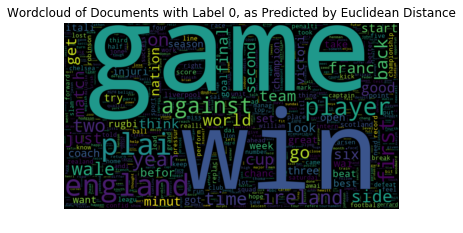

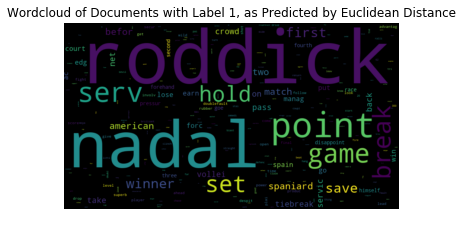

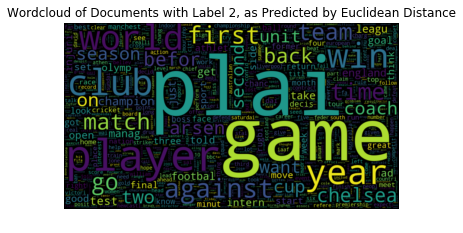

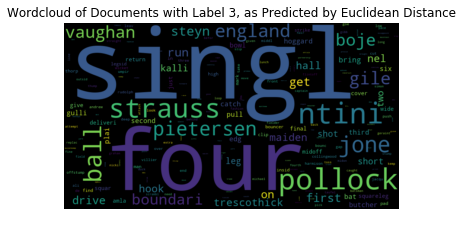

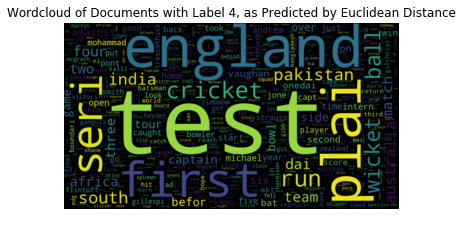

In [34]:
wordcloud_athletics = WordCloud(width=900,height=500, max_words=4613,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictLabel0)
plt.imshow(wordcloud_athletics, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Documents with Label 0, as Predicted by Euclidean Distance')
plt.show()

wordcloud_cricket = WordCloud(width=900,height=500, max_words=4613,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictLabel1)
plt.imshow(wordcloud_cricket, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Documents with Label 1, as Predicted by Euclidean Distance')
plt.show()

wordcloud_football = WordCloud(width=900,height=500, max_words=4613,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictLabel2)
plt.imshow(wordcloud_football, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Documents with Label 2, as Predicted by Euclidean Distance')
plt.show()

wordcloud_rugby = WordCloud(width=900,height=500, max_words=4613,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictLabel3)
plt.imshow(wordcloud_rugby, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Documents with Label 3, as Predicted by Euclidean Distance')
plt.show()

wordcloud_tennis = WordCloud(width=900,height=500, max_words=4613,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictLabel4)
plt.imshow(wordcloud_tennis, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Documents with Label 4, as Predicted by Euclidean Distance')
plt.show()

Justification: Finally, I have plotted the word clouds. These are created by using the wordcloud module from the WordCloud library. 

In [3]:
# repeating the same procedure as above for Cosine Distance K-means generated labels
Label0_doc = []
Label1_doc = []
Label2_doc = []
Label3_doc = []
Label4_doc = []
for i in range(0,len(kmeans_cosine_labels)):
    if kmeans_cosine_labels[i] == 0:
        Label0_doc.append(X[i,:])
    elif kmeans_cosine_labels[i] == 1:
        Label1_doc.append(X[i,:])
    elif kmeans_cosine_labels[i] == 2:
        Label2_doc.append(X[i,:])
    elif kmeans_cosine_labels[i] == 3:
        Label3_doc.append(X[i,:])
    elif kmeans_cosine_labels[i] == 4:
        Label4_doc.append(X[i,:])

Label0_doc = np.array(np.sum(Label0_doc,axis=0))
Label1_doc = np.array(np.sum(Label1_doc,axis=0))
Label2_doc = np.array(np.sum(Label2_doc,axis=0))
Label3_doc = np.array(np.sum(Label3_doc,axis=0))
Label4_doc = np.array(np.sum(Label4_doc,axis=0))

dictLabel0 = {}
dictLabel1 = {}
dictLabel2 = {}
dictLabel3 = {}
dictLabel4 = {}
for i in range(len(terms)):
    dictLabel0[''.join(terms[i].tolist())] = float(Label0_doc[i])
    dictLabel1[''.join(terms[i].tolist())] = float(Label1_doc[i])
    dictLabel2[''.join(terms[i].tolist())] = float(Label2_doc[i])
    dictLabel3[''.join(terms[i].tolist())] = float(Label3_doc[i])
    dictLabel4[''.join(terms[i].tolist())] = float(Label4_doc[i])

wordcloud_athletics = WordCloud(width=900,height=500, max_words=4613,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictLabel0)
plt.imshow(wordcloud_athletics, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Documents with Label 0, as Predicted by Cosine Distance')
plt.show()

wordcloud_cricket = WordCloud(width=900,height=500, max_words=4613,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictLabel1)
plt.imshow(wordcloud_cricket, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Documents with Label 1, as Predicted by Cosine Distance')
plt.show()

wordcloud_football = WordCloud(width=900,height=500, max_words=4613,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictLabel2)
plt.imshow(wordcloud_football, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Documents with Label 2, as Predicted by Cosine Distance')
plt.show()

wordcloud_rugby = WordCloud(width=900,height=500, max_words=4613,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictLabel3)
plt.imshow(wordcloud_rugby, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Documents with Label 3, as Predicted by Cosine Distance')
plt.show()

wordcloud_tennis = WordCloud(width=900,height=500, max_words=4613,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictLabel4)
plt.imshow(wordcloud_tennis, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of Documents with Label 4, as Predicted by Cosine Distance')
plt.show()

NameError: name 'kmeans_cosine_labels' is not defined

Justification: I have repeated the same steps that I followed to create word clouds from the Class Labels that were predicted by Euclidean Distance. This time, however, I have used the Class Labels predicted by using Cosine Distance as the similarity measure. 

### Part-2 (Dimensionality Reduction using PCA/SVD):
*For the provided BBC sports dataset, perform PCA and plot the captured variance with respect to increasing latent dimensionality. What is the minimum dimension that captures (a) at least 95% variance and (b) at least 98% variance? **(5 marks)***

### Import the required libraries

In [36]:
from sklearn.decomposition import PCA

In [101]:
pca = PCA(n_components=737)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=737, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Justification: I ran the code of the pca using 4613 as the number of components and was confused by the algorithm only producing 737 outputs. 

I realised that the number of components was much lower than the number of features. The features are the terms and the components are the documents. The PCA algorithm is limited by the smaller of the two values, which in this case is the number of components.

As a result, I have used 'n_components' as 737.

Text(0,0.5,'Variance Captured')

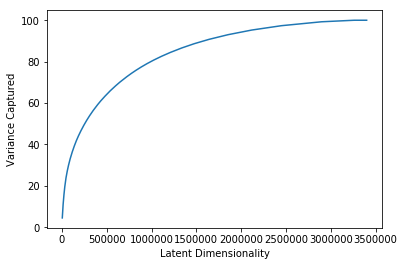

In [107]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
dimensionality = np.arange(1,738,1)*4613
plt.plot(dimensionality,var1)
plt.xlabel("Latent Dimensionality")
plt.ylabel("Variance Captured")

Justification: I used the 'explained_variance_ratio_' method to create the cumulative sum of the rounded PCA analysis. This step is used to determine how many components are necessary. 

The dimensionality vector is composed of values starting from 4613 and increasing by 4613 for each additional document.

The plot shows the Variance Captured Vs the Latent Dimensionality. Beyond ~200000 dimensions, the incremental variance is very small.

In [110]:
i = 0
while var1[i]<95.00:
    i = i+1
    
print(('Minimum dimension with at least 95% variance is: {}').format((i+1)*4613))

while var1[i]<98.00:
    i = i+1

print(('Minimum dimension with at least 98% variance is: {}').format((i+1)*4613))

Minimum dimension with at least 95% variance is: 2089689
Minimum dimension with at least 98% variance is: 2606345


Justification: I have simply used a loop to find the minimum dimension at which the variance clears the required threshold.

---
<div style="text-align: center">**END OF ASSIGNMENT ONE**</div>